# K-Means (PCA)

<br> 

Throughout this notebook, the original datasets shall be reduced in dimensions via the utilization of Principal Component Analysis and a K-Means model will further be implemented on both the new Zero and Nonzero Datasets.

## <u> Table of Contents </u>
* [Import the DataSet](#1)
* [PCA](#22.1)
* [Modelling Zero Data](#22.3)
    * [Elbow & Silhoutte: PCA Zero](#23.3)
        * [Zero: K-Means](#M11)
        * [Zero Visualisation](#N00)
* [Modelling Nonzero Data](#MU)
    * [Elbow & Silhoutte: PCA Nonzero](#NN)
        * [Nonzero: K-Means](#M16)
        * [Nonzero Visualisation](#N0)

<br>

## Import the DataSet  <a class="anchor" id="1"></a>

In [1]:
#!pip install plotly
#!pip install joypy
#!pip install pyvis
#!pip install prince
#!pip install pyclustering
#!pip install clusteval
#!pip install kmodes
#!pip install gower
#!pip install scikit-learn-extra
#!pip install minisom
#!pip install fuzzy-c-means

In [2]:
# Remove the warnings

import warnings; warnings.simplefilter('ignore')

# Basic Packages

import pandas as pd
import numpy as np
from numpy import asarray
from numpy import save

# Set a random state 

np.random.seed(9)

# Notebook Setup

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
pd.set_option('display.max_columns', None)

# Plotting Packages

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from matplotlib.widgets import SpanSelector
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from joypy import joyplot
from pyvis.network import Network
from IPython.display import Image
import plotly.offline as pyo

# Set notebook mode to work in offline

pyo.init_notebook_mode()

# Packages for Transformations

import scipy.special
import prince
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Packages for Clustering

from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from clusteval import clusteval
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering 
import gower
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from minisom import MiniSom
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as shc
from fcmeans import FCM

# Packages to measure performance

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from scipy.spatial import distance as ssd
from pyclustering.cluster.kmedoids import kmedoids

In [3]:
# Import the zero dataset 

final_zero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/final_zero.csv')
tra_zero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/tra_zero.csv')
zero_df = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/zero_df.csv')

# Import the nonzero dataset 

final_nonzero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/final_nonzero.csv')
tra_nonzero = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/tra_nonzero.csv')
nonzero_df = pd.read_csv('/Users/cirillogirardi/Desktop/Dissertation/Original/nonzero_df.csv')

# PCA  <a class="anchor" id="22.1"></a>


We now adopt PCA to assess whether this can yield better results than the original dataset. <br>
Since the data shall be used primarily for financial assessments of companies, we set the components to 0.95. <br> <br>

In [1125]:
# define the PCA algorithm

pca = PCA(n_components=0.95)

# Zero Dataset
# we apply pca to the zero dataset

PCA_zero = pca.fit_transform(final_zero)

# Nonzero Dataset
# we apply pca to the non-zero dataset

PCA_nonzero = pca.fit_transform(final_nonzero)

In [1086]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

<br>

# Modelling the PCA DataSet  <a class="anchor" id="23.2"></a>

Once all models have been applied to the Original dataset, we can now focus on the datasets that have been dimensionally reduced. <br><br>
To ensure consistency and standardization we follow the same approach, namely: <br>
- identify the optimal number of clusters
- apply the clustering models.
<br>

## Model Definition

In [1077]:
# We define the models we are interested in set the parameters to evaluate the GOF

ce_kmeans = clusteval(cluster= 'kmeans', evaluate='silhouette')

<br>

## Modelling Zero Data  <a class="anchor" id="22.3"></a>

<br>

## Elbow & Sillhoutte: PCA  Zero <a class="anchor" id="23.3"></a>

<br>

**Zero**
<br>


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|███████████████████████████████████████████| 23/23 [00:16<00:00,  1.40it/s]


[clusteval] >Optimal number clusters detected: [13].
[clusteval] >Fin.


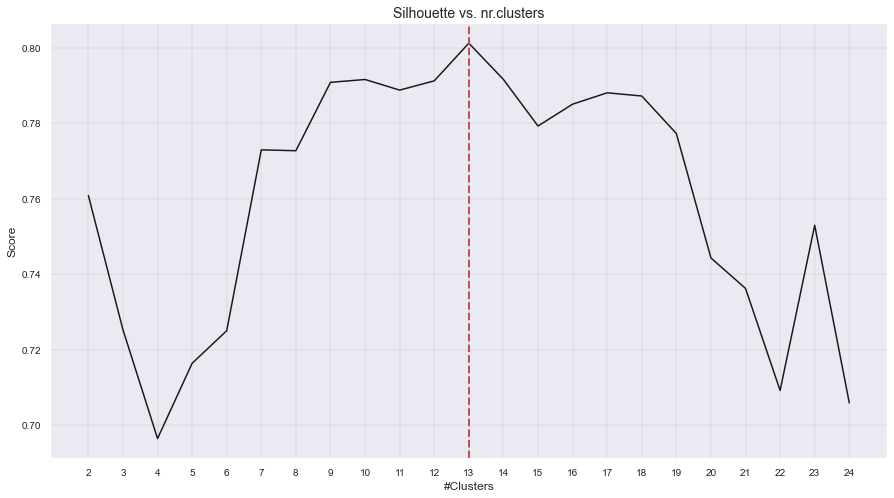

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [1126]:
# Fit the array to find optimal number of clusters

ce_kmeans.fit(PCA_zero)

# Make plot of the silhouette

ce_kmeans.plot()

**Zero Data-Set**

#### K-Means  <a class="anchor" id="M11"></a>

In [1142]:
# set the model and the respective parameters

k_model_PCA_zero = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, 
                 n_clusters=13, n_init=10, n_jobs=3, precompute_distances='auto',
                 random_state=9, tol=0.0001, verbose=0)

# Fit the function to the PCA zero dataset

k_model_PCA_zero.fit(PCA_zero)
k_model_PCA_zero.cluster_centers_

# Assign the labels to the respective rows and further view the cluster segmentation 

final_zero['Cluster_k_PCA'] = k_model_PCA_zero.labels_
tra_zero['Cluster_k_PCA'] = k_model_PCA_zero.labels_

zero_df["Cluster_k_PCA"] = k_model_PCA_zero.labels_
zero_df['Cluster_k_PCA'].value_counts()

1     2015
6     1034
0      398
7      346
4      276
2      226
9      197
3      188
12     178
10     101
5       99
8       71
11      57
Name: Cluster_k_PCA, dtype: int64

In [1143]:
print(silhouette_score(final_zero, final_zero["Cluster_k_PCA"]))
print(calinski_harabasz_score(final_zero, final_zero["Cluster_k_PCA"]))
print(davies_bouldin_score(final_zero, final_zero["Cluster_k_PCA"]))

print(silhouette_score(zero_df, zero_df['Cluster_k_PCA']))
print(calinski_harabasz_score(zero_df, zero_df['Cluster_k_PCA']))
print(davies_bouldin_score(zero_df, zero_df['Cluster_k_PCA']))

0.42247208899210764
17254.65059622588
1.0790709086743755
-0.6355609331811132
10.488292781531541
14.178433377883225


###  Zero Visualisation <a class="anchor" id="N00"></a>

In [1144]:
tt = tra_zero.drop(columns=['Cluster_k', 'Cluster_h', 'Cluster_DBSCAN', 'Cluster_k_PCA'])

PCs_1d = pd.DataFrame(pca_1d.fit_transform(tt))

PCs_2d = pd.DataFrame(pca_2d.fit_transform(tt))

PCs_3d = pd.DataFrame(pca_3d.fit_transform(tt))


#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'

PCs_1d.columns = ["PC1_1d"]

PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


tra_zero1=tra_zero.copy()

tra_zero1 = pd.concat([tra_zero1,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')



cluster0_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 0]
cluster1_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 1]
cluster2_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 2]
cluster3_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 3]
cluster4_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 4]
cluster5_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 5]
cluster6_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 6]
cluster7_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 7]
cluster8_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 8]
cluster9_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 9]
cluster10_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 10]
cluster11_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 11]
cluster12_pk = tra_zero1[tra_zero1["Cluster_k_PCA"] == 12]

In [1145]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter(
                    x = cluster0_pk["PC1_2d"],
                    y = cluster0_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter(
                    x = cluster1_pk["PC1_2d"],
                    y = cluster1_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter(
                    x = cluster2_pk["PC1_2d"],
                    y = cluster2_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter(
                    x = cluster3_pk["PC1_2d"],
                    y = cluster3_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter(
                    x = cluster4_pk["PC1_2d"],
                    y = cluster4_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter(
                    x = cluster5_pk["PC1_2d"],
                    y = cluster5_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)

#For 'Cluster 6'
trace6 = go.Scatter(
                    x = cluster6_pk["PC1_2d"],
                    y = cluster6_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'red'),
                    text = None)

#For 'Cluster 7'
trace7 = go.Scatter(
                    x = cluster7_pk["PC1_2d"],
                    y = cluster7_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 7",
                    marker = dict(color = 'green'),
                    text = None)

#For 'Cluster 8'
trace8 = go.Scatter(
                    x = cluster8_pk["PC1_2d"],
                    y = cluster8_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 8",
                    marker = dict(color = 'yellow'),
                    text = None)

#For 'Cluster 9'
trace9 = go.Scatter(
                    x = cluster9_pk["PC1_2d"],
                    y = cluster9_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 9",
                    marker = dict(color = 'purple'),
                    text = None)

#For 'Cluster 10'
trace10 = go.Scatter(
                    x = cluster10_pk["PC1_2d"],
                    y = cluster10_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 10",
                    marker = dict(color = 'brown'),
                    text = None)

#For 'Cluster 11'
trace11 = go.Scatter(
                    x = cluster11_pk["PC1_2d"],
                    y = cluster11_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 11",
                    marker = dict(color = 'gold'),
                    text = None)

#For 'Cluster 12'
trace12 = go.Scatter(
                    x = cluster12_pk["PC1_2d"],
                    y = cluster12_pk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 12",
                    marker = dict(color = 'indigo'),
                    text = None)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)


In [1146]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter3d(
                    x = cluster0_pk["PC1_3d"],
                    y = cluster0_pk["PC2_3d"],
                    z = cluster0_pk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter3d(
                    x = cluster1_pk["PC1_3d"],
                    y = cluster1_pk["PC2_3d"],
                    z = cluster1_pk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter3d(
                    x = cluster2_pk["PC1_3d"],
                    y = cluster2_pk["PC2_3d"],
                    z = cluster2_pk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter3d(
                    x = cluster3_pk["PC1_3d"],
                    y = cluster3_pk["PC2_3d"],
                    z = cluster3_pk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter3d(
                    x = cluster4_pk["PC1_3d"],
                    y = cluster4_pk["PC2_3d"],
                    z = cluster4_pk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter3d(
                    x = cluster5_pk["PC1_3d"],
                    y = cluster5_pk["PC2_3d"],
                    z = cluster5_pk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)

#For 'Cluster 6'
trace6 = go.Scatter3d(
                    x = cluster6_pk["PC1_3d"],
                    y = cluster6_pk["PC2_3d"],
                    z = cluster6_pk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'red'),
                    text = None)

#For 'Cluster 7'
trace7 = go.Scatter3d(
                    x = cluster7_pk["PC1_3d"],
                    y = cluster7_pk["PC2_3d"],
                    z = cluster7_pk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 7",
                    marker = dict(color = 'green'),
                    text = None)

#For 'Cluster 8'
trace8 = go.Scatter3d(
                    x = cluster8_pk["PC1_3d"],
                    y = cluster8_pk["PC2_3d"],
                    z = cluster8_pk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 8",
                    marker = dict(color = 'yellow'),
                    text = None)

#For 'Cluster 9'
trace9 = go.Scatter3d(
                    x = cluster9_pk["PC1_3d"],
                    y = cluster9_pk["PC2_3d"],
                    z = cluster9_pk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 9",
                    marker = dict(color = 'purple'),
                    text = None)

#For 'Cluster 10'
trace10 = go.Scatter3d(
                    x = cluster10_pk["PC1_3d"],
                    y = cluster10_pk["PC2_3d"],
                    z = cluster10_pk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 10",
                    marker = dict(color = 'brown'),
                    text = None)

#For 'Cluster 11'
trace11 = go.Scatter3d(
                    x = cluster11_pk["PC1_3d"],
                    y = cluster11_pk["PC2_3d"],
                    z = cluster11_pk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 11",
                    marker = dict(color = 'gold'),
                    text = None)

#For 'Cluster 12'
trace12 = go.Scatter3d(
                    x = cluster12_pk["PC1_3d"],
                    y = cluster12_pk["PC2_3d"],
                    z = cluster12_pk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 12",
                    marker = dict(color = 'indigo'),
                    text = None)


data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

##  Modelling Nonzero Data<a class="anchor" id="MU"></a>

###  Elbow and Silhouette: Non-Zero PCA <a class="anchor" id="NN"></a>

<br>
<br>

**Non-Zero**
<br>


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|███████████████████████████████████████████| 23/23 [01:16<00:00,  3.32s/it]


[clusteval] >Optimal number clusters detected: [13].
[clusteval] >Fin.


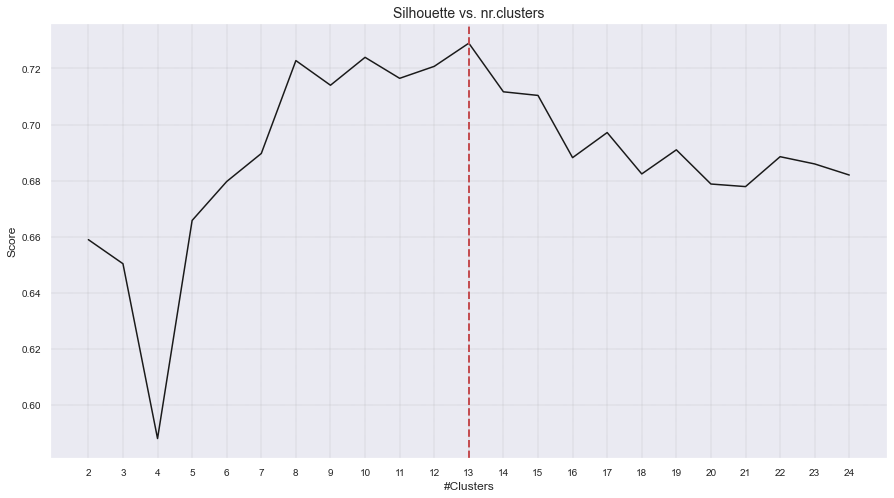

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [1132]:
# Fit the array to find optimal number of clusters

ce_kmeans.fit(PCA_nonzero)

# Make plot of the silhouette

ce_kmeans.plot()

#### K-Means <a class="anchor" id="M16"></a>

In [1161]:
# set the model and the respective parameters

k_model_PCA_nonzero = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, 
                 n_clusters=10, n_init=10, n_jobs=3, precompute_distances='auto',
                 random_state=9, tol=0.0001, verbose=0)

# Fit the function to the PCA nonzero dataset

k_model_PCA_nonzero.fit(PCA_nonzero)
k_model_PCA_nonzero.cluster_centers_

# Assign the labels to the respective rows and further view the cluster segmentation 

final_nonzero['Cluster_k_PCA'] = k_model_PCA_nonzero.labels_
tra_nonzero['Cluster_k_PCA'] = k_model_PCA_nonzero.labels_

nonzero_df["Cluster_k_PCA"] = k_model_PCA_nonzero.labels_
nonzero_df['Cluster_k_PCA'].value_counts()

1    2642
0    2094
6    1968
9    1507
5    1387
3    1242
8     953
2     885
4     670
7     459
Name: Cluster_k_PCA, dtype: int64

<br>

In [1162]:
print(silhouette_score(final_nonzero, final_nonzero["Cluster_k_PCA"]))
print(calinski_harabasz_score(final_nonzero, final_nonzero["Cluster_k_PCA"]))
print(davies_bouldin_score(final_nonzero, final_nonzero["Cluster_k_PCA"]))

print(silhouette_score(nonzero_df, nonzero_df['Cluster_k_PCA']))
print(calinski_harabasz_score(nonzero_df, nonzero_df['Cluster_k_PCA']))
print(davies_bouldin_score(nonzero_df, nonzero_df['Cluster_k_PCA']))

0.40415143198574666
53881.02662170074
0.9775229645643095
-0.5598899560629034
89.9142948872458
9.285471260047526


###   Non-Zero Visualisation <a class="anchor" id="N0"></a>

In [1163]:
nn = tra_nonzero.drop(columns=['Cluster_k', 'Cluster_h', 'Cluster_DBSCAN', 'Cluster_k_PCA'])

PCs_1d_n = pd.DataFrame(pca_1d.fit_transform(nn))

PCs_2d_n = pd.DataFrame(pca_2d.fit_transform(nn))

PCs_3d_n = pd.DataFrame(pca_3d.fit_transform(nn))


#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'

PCs_1d_n.columns = ["PC1_1d"]

PCs_2d_n.columns = ["PC1_2d", "PC2_2d"]

PCs_3d_n.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]


tra_nonzero1=tra_nonzero.copy()

tra_nonzero1 = pd.concat([tra_nonzero1,PCs_1d_n,PCs_2d_n,PCs_3d_n], axis=1, join='inner')


cluster0_npk = tra_nonzero1[tra_nonzero1["Cluster_k_PCA"] == 0]
cluster1_npk = tra_nonzero1[tra_nonzero1["Cluster_k_PCA"] == 1]
cluster2_npk = tra_nonzero1[tra_nonzero1["Cluster_k_PCA"] == 2]
cluster3_npk = tra_nonzero1[tra_nonzero1["Cluster_k_PCA"] == 3]
cluster4_npk = tra_nonzero1[tra_nonzero1["Cluster_k_PCA"] == 4]
cluster5_npk = tra_nonzero1[tra_nonzero1["Cluster_k_PCA"] == 5]
cluster6_npk = tra_nonzero1[tra_nonzero1["Cluster_k_PCA"] == 6]
cluster7_npk = tra_nonzero1[tra_nonzero1["Cluster_k_PCA"] == 7]
cluster8_npk = tra_nonzero1[tra_nonzero1["Cluster_k_PCA"] == 8]
cluster9_npk = tra_nonzero1[tra_nonzero1["Cluster_k_PCA"] == 9]

In [1164]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter(
                    x = cluster0_npk["PC1_2d"],
                    y = cluster0_npk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter(
                    x = cluster1_npk["PC1_2d"],
                    y = cluster1_npk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter(
                    x = cluster2_npk["PC1_2d"],
                    y = cluster2_npk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter(
                    x = cluster3_npk["PC1_2d"],
                    y = cluster3_npk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter(
                    x = cluster4_npk["PC1_2d"],
                    y = cluster4_npk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter(
                    x = cluster5_npk["PC1_2d"],
                    y = cluster5_npk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)

#For 'Cluster 6'
trace6 = go.Scatter(
                    x = cluster6_npk["PC1_2d"],
                    y = cluster6_npk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'red'),
                    text = None)

#For 'Cluster 7'
trace7 = go.Scatter(
                    x = cluster7_npk["PC1_2d"],
                    y = cluster7_npk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 7",
                    marker = dict(color = 'green'),
                    text = None)

#For 'Cluster 8'
trace8 = go.Scatter(
                    x = cluster8_npk["PC1_2d"],
                    y = cluster8_npk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 8",
                    marker = dict(color = 'yellow'),
                    text = None)

#For 'Cluster 9'
trace9 = go.Scatter(
                    x = cluster9_npk["PC1_2d"],
                    y = cluster9_npk["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 9",
                    marker = dict(color = 'purple'),
                    text = None)


data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)

In [1165]:
#Instructions for building the 2-D plot

#For 'Cluster 0'
trace0 = go.Scatter3d(
                    x = cluster0_npk["PC1_3d"],
                    y = cluster0_npk["PC2_3d"],
                    z = cluster0_npk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#For 'Cluster 1'
trace1 = go.Scatter3d(
                    x = cluster1_npk["PC1_3d"],
                    y = cluster1_npk["PC2_3d"],
                    z = cluster1_npk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#For 'Cluster 2'
trace2 = go.Scatter3d(
                    x = cluster2_npk["PC1_3d"],
                    y = cluster2_npk["PC2_3d"],
                    z = cluster2_npk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#For 'Cluster 3'
trace3 = go.Scatter3d(
                    x = cluster3_npk["PC1_3d"],
                    y = cluster3_npk["PC2_3d"],
                    z = cluster3_npk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'grey'),
                    text = None)

#For 'Cluster 4'
trace4 = go.Scatter3d(
                    x = cluster4_npk["PC1_3d"],
                    y = cluster4_npk["PC2_3d"],
                    z = cluster4_npk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'black'),
                    text = None)

#For 'Cluster 5'
trace5 = go.Scatter3d(
                    x = cluster5_npk["PC1_3d"],
                    y = cluster5_npk["PC2_3d"],
                    z = cluster5_npk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 5",
                    marker = dict(color = 'blue'),
                    text = None)

#For 'Cluster 6'
trace6 = go.Scatter3d(
                    x = cluster6_npk["PC1_3d"],
                    y = cluster6_npk["PC2_3d"],
                    z = cluster6_npk["PC3_3d"],                
                    mode = "markers",
                    name = "Cluster 6",
                    marker = dict(color = 'red'),
                    text = None)


#For 'Cluster 7'
trace7 = go.Scatter3d(
                    x = cluster7_npk["PC1_2d"],
                    y = cluster7_npk["PC2_2d"],
                    z = cluster7_npk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 7",
                    marker = dict(color = 'green'),
                    text = None)

#For 'Cluster 8'
trace8 = go.Scatter3d(
                    x = cluster8_npk["PC1_2d"],
                    y = cluster8_npk["PC2_2d"],
                    z = cluster8_npk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 8",
                    marker = dict(color = 'yellow'),
                    text = None)

#For 'Cluster 9'
trace9 = go.Scatter3d(
                    x = cluster9_npk["PC1_2d"],
                    y = cluster9_npk["PC2_2d"],
                    z = cluster9_npk["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 9",
                    marker = dict(color = 'purple'),
                    text = None)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

pyo.iplot(fig)